In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!python --version

Python 3.8.10


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
data = pd.read_csv("Twitter_Data.csv")
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
data.shape

(162980, 2)

In [ ]:
data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
# Processing the text

lm = WordNetLemmatizer()

def text_transformation(df_col):
  corpus = []
  for text in df_col:
    new_text = re.sub('[^a-zA-Z]',' ', str(text))
    new_text = new_text.lower()
    new_text = new_text.split()
    new_text = [lm.lemmatize(word) for word in new_text 
                if word not in set(stopwords.words('english'))]
    corpus.append(" ".join(str(word) for word in new_text))

  return corpus                                   

In [ ]:
corpus = text_transformation(data['clean_text'])

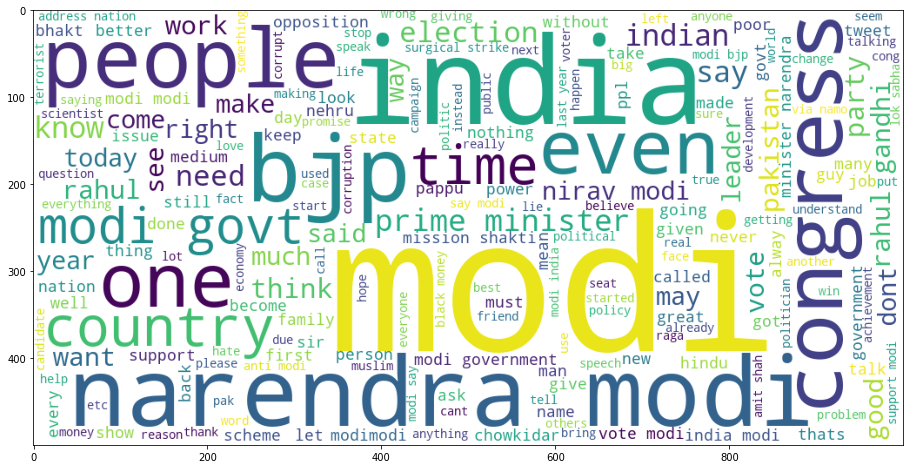

In [ ]:
plt.rcParams['figure.figsize'] = (20,8)
word_cloud = ""

for row in corpus:
  for word in row:
    word_cloud += " ".join(word)

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white',
                      min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [ ]:
labels = pd.get_dummies(data.category)
labels.columns = ['negative', 'neutral', 'positive']
labels.head()

,negative,neutral,positive
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


## Model Building

In [ ]:
# Bag of Words
cv = CountVectorizer(ngram_range=(1,2))
X = cv.fit_transform(corpus)
Y = labels

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
# Model
model = RandomForestClassifier(n_estimators = 200)
model.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=200)

In [ ]:
import joblib
joblib.dump(model, "./sentiment_model.joblib")

['./sentiment_model.joblib']

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, classification_report


In [ ]:
ypred = model.predict(xtest)

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.92      0.29      0.44      7152
           1       0.85      0.91      0.88     11067
           2       0.93      0.76      0.84     14375

   micro avg       0.89      0.71      0.79     32594
   macro avg       0.90      0.66      0.72     32594
weighted avg       0.90      0.71      0.77     32594
 samples avg       0.71      0.71      0.71     32594



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
text = 'i eat every day'

corpus = text_transformation([text])
transformed = cv.transform(corpus)

y = model.predict(transformed)
print(y)

[[0 1 0]]


In [ ]:
joblib.dump(cv, './countvector.joblib')

['./countvector.joblib']

In [ ]:
joblib.dump(lm,'./lemmitizer.joblib')

['./lemmitizer.joblib']